<h1><center>MDI343 / MDI724 - TP1 Avazu<center></h1>

<font color="red">**Question 0:**
    Import the needed packages: numpy, pandas etc..
</font>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from joblib import dump, load
warnings.filterwarnings(action='ignore')
%matplotlib inline

# The dataset

<font color="red">**Question 1:**
    Load the data into a pandas DataFrame and display the first lines with the ".head()" method.
    <br>
</font>
**Remark**: the features meaning is available at https://www.kaggle.com/c/avazu-ctr-prediction/data

In [161]:
df = pd.read_csv('train-1000000')

In [113]:
df.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23
5,1.591127e+19,0,14102700,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
6,4.149473e+18,0,14102408,1010,1,85f751fd,c4e18dd6,50e219e0,03a08c3f,7801e8d9,...,4,3,15704,320,50,1722,0,35,100084,79
7,1.085379e+19,0,14102904,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23224,320,50,2676,0,35,100176,221
8,2.629918e+18,0,14102513,1010,1,85f751fd,c4e18dd6,50e219e0,8486dd4e,7801e8d9,...,4,0,17875,320,50,2036,3,47,-1,156
9,1.419062e+19,0,14102600,1010,1,85f751fd,c4e18dd6,50e219e0,04f2be5f,7801e8d9,...,4,3,22552,320,50,2602,0,163,100084,182


<font color="red">**Question 2:**
    What is the 'click' frequency in the dataset?
    <br>
</font>

In [114]:
freq = df.click.mean()
print(f'La frequence moyenne de click est {freq:.5f}')


La frequence moyenne de click est 0.16997


We note that the Avazu dataset is very unbalanced. The 'click' class represents less than a fifth of the whole database. We already know that a classifier always predicting 'click'=0 will have good preformances in terms of error rate (around 0.17). The ROC and lift curves will be better performance metrics.

<font color="red">**Question 3:**
    What are the categorical features? Using the 'df.dtypes' method, compute the number of distincts values for each of these features.
</font>

In [115]:
print(df.dtypes)

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object


In [116]:
df.nunique()

id                  1000000
click                     2
hour                    240
C1                        7
banner_pos                7
site_id                2651
site_domain            2871
site_category            22
app_id                 3157
app_domain              198
app_category             26
device_id            150501
device_ip            555248
device_model           5168
device_type               5
device_conn_type          4
C14                    2243
C15                       8
C16                       9
C17                     420
C18                       4
C19                      66
C20                     163
C21                      60
dtype: int64

In [117]:
# Version plus rapide en temps d'execution
for column in df.columns:
    print(f"{column} {len(df[column].unique())}")

id 1000000
click 2
hour 240
C1 7
banner_pos 7
site_id 2651
site_domain 2871
site_category 22
app_id 3157
app_domain 198
app_category 26
device_id 150501
device_ip 555248
device_model 5168
device_type 5
device_conn_type 4
C14 2243
C15 8
C16 9
C17 420
C18 4
C19 66
C20 163
C21 60


Quasiment toutes des features sont catégorielles. Seule l'heure peut être considéré comme continue.

<font color="red">**Question 4:**
    If one does a dummy encoding of all categorical variables, what would be the dimension of the model?
    In other words: what would be the dimension of our big feature vector encoded with dummies. 
    <br>
</font>

In [118]:
dummy_size = df.nunique().sum()-df.id.count()
print(f'The size of the dummy encoding would be {dummy_size}, which is a lot of features !')

The size of the dummy encoding would be 723080, which is a lot of features !


<font color="red">**Question 5:**
    Analyze the 'hour' column: which format is used? How can we transform/simply this feature?
</font>

In [119]:
print(df['hour'].head()) # Fill here
print()
print(df['hour'].tail()) # Fill here

0    14102915
1    14103007
2    14102711
3    14102903
4    14102902
Name: hour, dtype: int64

999995    14102602
999996    14102101
999997    14102318
999998    14102908
999999    14102600
Name: hour, dtype: int64


On pourrait extraire uniquement le jour de la semaine et l'heure à laquelle on observe. Toutes ses observations se déroulent sur le même mois. L'année (2014), et le mois (octobre) ne nous servent qu'à obtenir spécifiquement le jour de la semaine.

<font color="red">**Question 6:**
    Run and understand the following script.
</font>

In [120]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

In [121]:
datesplit(19011315).weekday()

6

<font color="red">**Question 7:**
    Using the ".apply( ... )" method, create a 'weekday' for the day of the week. Then, replace the 'hour' column by the hour.
</font>

To answer this question you have to understand that applies takes a function as argument
<br>
"lambda x: ... " is used to create local unamed function of x
<br>
Check the documentation: https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions

In [162]:
df['weekday'] = df.hour.apply(lambda x: datesplit(x).weekday())
df['hour'] = df.hour.apply(lambda x: datesplit(x).hour)

In [123]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,2,4687,320,50,423,2,39,100148,32,2
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,17894,320,50,2039,2,39,100077,32,3
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,0,22684,320,50,2619,1,163,100055,71,0
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,0,23222,320,50,2676,0,35,100176,221,2
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,0,8330,320,50,761,3,175,100081,23,2


<font color="red">**Question 8:**
    Using the ".groupby( ... )" method, visualize the influence of the hour and of the day on the 'click' frequency. To do so, plot 'click' vs 'hour' and 'click' vs 'weekday' curves.
</font>

In [124]:
print(df.groupby('hour')['click'].mean())
print()
print(df.groupby('weekday')['click'].mean())

hour
0     0.182707
1     0.185734
2     0.175552
3     0.175367
4     0.159664
5     0.162126
6     0.169315
7     0.177490
8     0.163418
9     0.159042
10    0.162613
11    0.171025
12    0.171659
13    0.168032
14    0.178075
15    0.183737
16    0.180076
17    0.173271
18    0.164072
19    0.165725
20    0.158402
21    0.162384
22    0.166847
23    0.170733
Name: click, dtype: float64

weekday
0    0.183143
1    0.161577
2    0.158675
3    0.173795
4    0.173392
5    0.183995
6    0.183105
Name: click, dtype: float64


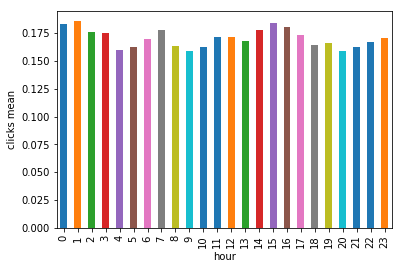

In [125]:
df.groupby('hour')['click'].mean().plot.bar() #Fill here for the influence of the hour
plt.xlabel('hour')
plt.ylabel('clicks mean')
plt.draw()

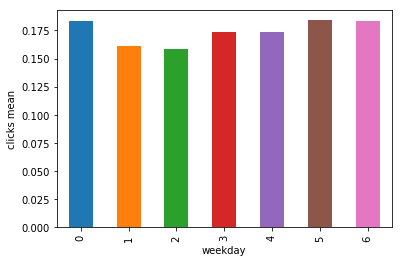

In [126]:
df.groupby('weekday')['click'].mean().plot.bar() # Fill here for the influence of the day
plt.xlabel('weekday')
plt.ylabel('clicks mean')
plt.draw()

<font color="red">**Question 9:**
    Explain what the axes stand for and try to interpret the shape of the obtained curves.
</font>

L'ordonnée représente la fréquence des clics en fonction de l'abscisse qui est, dasn un premier temps, les différentes heures de la journée, puis les jours de la semaine (0 étant le lundi, 1 : mardi ... 6: dimanche).

On constate que les jour où les gens cliquent le plus sont le lundi, le samedi et le dimanche, et mardi et mercredi sont les jours où il y en a moins.

# Preliminary work and first model

Start by understanding the features with few modalities:
'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.

<font color="red">**Question 10:**
    For instance, inspect the columns 'C15' (dimension of the advert) and 'site_category': visualize the clicks mean.
</font>

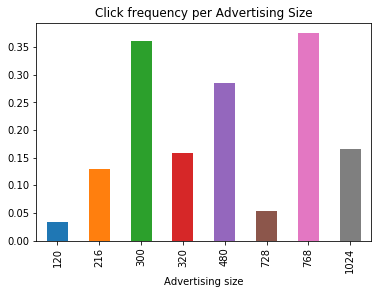

In [127]:
df.groupby('C15')['click'].mean().plot.bar() # Fill here: inspect 'C15' using '.groupby'
plt.title("Click frequency per Advertising Size")
plt.xlabel("Advertising size")
plt.show()

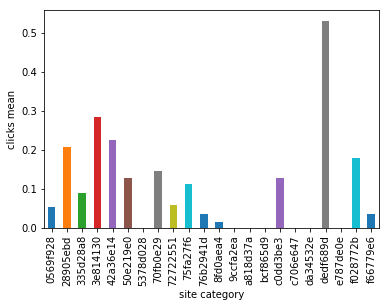

In [128]:
df.groupby('site_category')['click'].mean().plot.bar() # Fill here: inspect 'site_category' using '.groupby'
plt.xlabel('site category')
plt.ylabel('clicks mean')
plt.draw()

On remarquera que certaines catégories de site reçoivent beaucoup plus de clics que d'autre. Certains n'ont même pas de clics.

<font color="red">**Question 11:**
    Some site categories have a null click rate. Why? Display the 'count()' of each modality.
    <br><br>
    Hint: you can use the method ".value_counts()"
</font>

In [129]:
# Affiche le nombre de clicks et le nombre d'affichage (print)
b = pd.DataFrame([df.groupby('site_category')['click'].sum().sort_values(ascending=False), df.site_category.value_counts()]).transpose()
b.columns = ['sum click','sum print']
b

,sum click,sum print
f028772b,56313,313339
50e219e0,52586,408921
28905ebd,37874,182020
3e814130,21508,75667
75fa27f6,446,4007
dedf689d,331,624
335d28a8,301,3351
f66779e6,220,6365
c0dd3be3,132,1026
76b2941d,92,2573


It is practical to visualize both columns in parallel:

In [130]:
col = 'C1'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'count']
a.sort_values(by='count', ascending=False)

,mean,count
C1,,
1005,0.169474,918606.0
1002,0.211157,54907.0
1010,0.095497,22409.0
1012,0.177295,2854.0
1007,0.035591,871.0
1001,0.027027,222.0
1008,0.106870,131.0


<font color="red">**Question 12:**
    Divide the dataset into a training (90%) and test set (10%) with sklearn (use the following option: random_state=100).
</font>

In [163]:
X = df.drop(columns = ['id']).copy()
y = X.pop(item='click')

In [132]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=100)
print(Xtrain.shape, ytrain.shape)

(900000, 23) (900000,)


# First work on a reduced number of features

<font color="red">**Question 13:**
    Put in a list the selected columns: 'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.
</font>

In [133]:
some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21']

<font color="red">**Question 14:**
    <br>
    - Import OneHotEncoder from sklearn.preprocessing
    <br>
    - Transform the training and the test data restricted to the selected columns
    <br>
    - Give the type of the outputs.
</font>

In [134]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
Xtrain_oh = ohe.fit_transform(Xtrain[some_columns]) # fit the transformation of Xtrain restricted to selected columns
Xtest_oh = ohe.transform(Xtest[some_columns]) # and transform Xtest restricted to selected columns

print(f'Shape du Xtrain transformé par ohe : {Xtrain_oh.shape}')
print()
print(Xtest_oh[0])
print()
print(type(Xtest_oh))
print(f"le type de l'output est {Xtest_oh.dtype}.")

Shape du Xtrain transformé par ohe : (900000, 183)

  (0, 6)	1.0
  (0, 27)	1.0
  (0, 33)	1.0
  (0, 39)	1.0
  (0, 65)	1.0
  (0, 67)	1.0
  (0, 94)	1.0
  (0, 98)	1.0
  (0, 105)	1.0
  (0, 112)	1.0
  (0, 121)	1.0
  (0, 130)	1.0

<class 'scipy.sparse.csr.csr_matrix'>
le type de l'output est float64.


<font color="red">**Question 15:**
    What is the new number of features?
</font>

In [135]:
print(f'Nombre de nouveaux feature : {Xtrain_oh.shape[1]}') # Fill here

Nombre de nouveaux feature : 183


<font color="red">**Question 16:**
    Visualize the first row of the design matrix you have got.
</font>

In [136]:
# affiche la première ligne
Xtrain_oh.getrow(i=0).toarray() # Fill here

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]])

<font color="red">**Question 17:**
    Import and fit a logistic regression model on your the encoded data
</font>

In [137]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100,verbose=True)
lr.fit(Xtrain_oh, ytrain)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=100, solver='warn',
          tol=0.0001, verbose=True, warm_start=False)

<font color="red">**Question 18:**
    With '.predict' and 'predict_proba', display the hard and soft decision you get on test data.
</font>

In [138]:
hard = lr.predict(Xtest_oh)
soft = lr.predict_proba(Xtest_oh)

<font color="red">**Question 19:**
    Compute the probability of **error** using sklearn.metrics 'accuracy_score' function. Comment.
    
</font>

In [139]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,hard)
print(f"le pourcentage d'erreur est de {1-accuracy}.") # Fill here

le pourcentage d'erreur est de 0.16957.


<font color="red">**Question 20:**
    Which sklearn.metrics could you also use?
</font>

In [140]:
from sklearn.metrics import log_loss
logloss = log_loss(y_pred=soft,y_true=ytest)
print (logloss)

0.4251224682688907


<font color="red">**Question 21:**
    Plot the ROC curve. Then compute the log loss and the Area Under the Curve ROC.
</font>

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = lr.decision_function(Xtest_oh)


fpr, tpr, thresholds = roc_curve(y_true=ytest, y_score=y_score) # Fill here
auc = roc_auc_score(ytest, y_score)

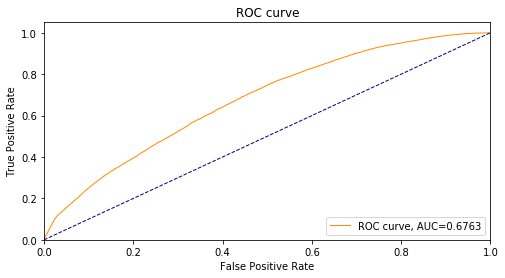

In [142]:
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve, AUC={auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [160]:
print (f"la valeur de la logloss est de : {logloss:.4f}.")
print (f"la valeur de la AUCROC est de : {auc:.4f}")


la valeur de la logloss est de : 0.4251.
la valeur de la AUCROC est de : 0.6763


<font color="red">**Question 22:**
    <br>
    - Import the 'plot_lift' function from 'utils.py' and plot the lift curve. What is the lift of the first fifth of the population identified by the test?
    <br>
    -  Interpret it. 
</font>

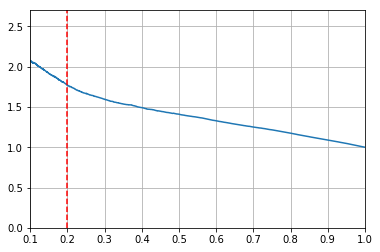

In [143]:
from utils import plotlift
plotlift(soft_pred=soft[:,1], y_true=ytest)

# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2, linestyle='--', color='r') # Fill here

# Complete model

As an example, we now work on the 'site_id' column.

<font color="red">**Question 23:**
    <br>
    - For each modality, compute the number of occurrences in the dataset and the average of clicks for this modality 
    <br>
    - With 'sns.joiplot', represent the set of points (count, mean) for each modality
</font>

In [144]:
import seaborn as sns

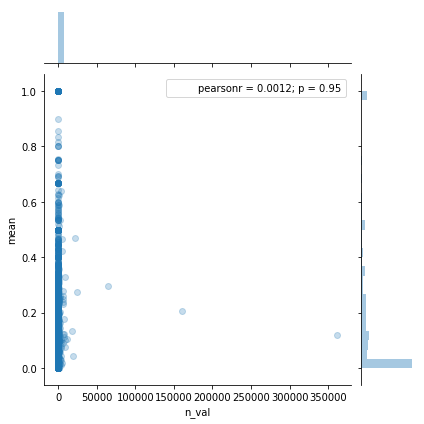

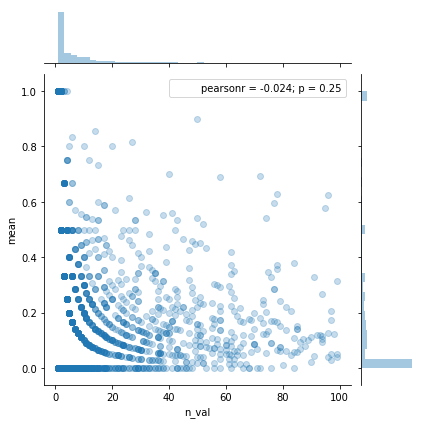

In [145]:
col = 'site_id'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 100
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

<font color="red">**Question 24:**
    In the above commands, what does the alpha parameter stand for?
</font>

Several sites with a lot of occurrences in the dataset have a click frequency very different from the mean. It is relevant to keep the column 'site_id' at least for the modalities for which 'count' is very high.

<font color="red">**Question 25:**
    Do the same work on the 'device_id' column. What do you notice? What could be the isolated point?
</font>

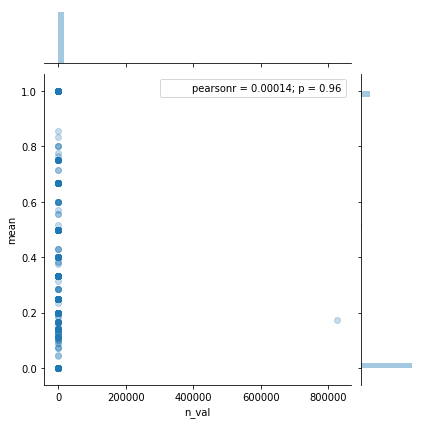

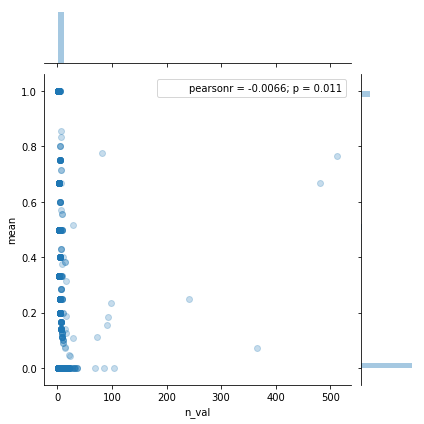

In [146]:
col = 'device_id' # Fill here
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

<font color="red">**Question 26**:   
    In the column df['device_id'], spot the value V corresponding to the largest number of 'count' (using '.value_counts' method). Create a new column df['user'] defined as follows:
</font>
$$
\text{user} = \left\{\begin{array}[h]{ll} \text{device_ip + device_model} & \text{if device_id = V}\\ \text{device_id} & \text{else.}\end{array}\right.
$$

In [164]:
V = df['device_id'].value_counts().idxmax()# Fill here
df['user'] = df.device_id
df.user.where(cond=df.device_id!=V, other=df.device_ip + df.device_model, inplace=True)


<font color="red">**Question 27**:
    Drop the following columns: 'device_id','device_model','device_ip'
</font>

In [165]:
df = df.drop(columns=['device_id','device_model','device_ip'])
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'weekday', 'user'],
      dtype='object')

<font color="red">**Question 28**:
    One could look at the similarity between 'site_id' and 'site_domain'. Merge those columns into a new 'site' column and delete the old 'site_id' and 'site_domain' columns.
</font>

In [166]:
df['site'] = df.site_id + df.site_domain
df.drop(columns=['site_id', 'site_domain'], inplace=True)
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'weekday', 'user',
       'site'],
      dtype='object')

<font color="red">**Question 29**:
    Once again, split the modified DataFrame df into a train (90%) and a test set (10%) (with option: random_state = 100).
</font>

In [167]:
X = df.copy()
# X = pd.DataFrame(index=df.id, columns=df.columns, data=df.values)
X = X.drop(columns='id')
y = X.pop(item='click')
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, random_state=100)

<font color="red">**Question 30**:
    Define a OneHotEncoder and then, 'fit_transform' the train set.
</font>

In [168]:
ohe = OneHotEncoder(handle_unknown='ignore')
Xtrain_oh = ohe.fit_transform(Xtrain)

print(f'Shape du Xtrain transformé par ohe : {Xtrain_oh.shape}')
# print()
print(type(Xtrain_oh))
# print(Xtest_oh.dtype)

Shape du Xtrain transformé par ohe : (900000, 713334)
<class 'scipy.sparse.csr.csr_matrix'>


<font color="red">**Question 31**:
    Transform the test set. If an error occurs, analyze it and try to solve it. Which argument did you set ?
</font>

In [169]:
Xtest_oh = ohe.transform(Xtest)
print(Xtest_oh.shape)

(100000, 713334)


<font color="red">**Question 32**:
    What is the new number of features?
</font>

In [172]:
print(f'Number of features : {Xtrain_oh.shape[1]}')

Number of features : 713334


<font color="red">**Question 33**:
    How many modalities have been seen more than a 100 times?
</font>

In [173]:
# The following 'n_ones' vector below gives the number of '1' in each column/modality of the Xtrain_oh design matrix.
n_ones = np.array(Xtrain_oh.sum(axis=0))
np.sum(n_ones>100)

1971

The list 'cols_to_keep' below is used to store the indices of the modalities seen more than a 100 times. You can notice the use of the 'enumerate' function.

In [156]:
cols_to_keep = np.argwhere(n_ones>100)[:,1] # Fill here.

<font color="red">**Question 34**:
    Using only our restriction on the 'cols_to_keep' columns, retrain a logistic regression model and compare its performance in terms of 'log_loss' and 'roc_auc_curve'.
</font>

In [174]:
lr2 = LogisticRegression(random_state=100)
lr2.fit(X=Xtrain_oh[:,cols_to_keep], y=ytrain.values)

hard = lr2.predict(Xtest_oh[:,cols_to_keep])
soft = lr2.predict_proba(Xtest_oh[:,cols_to_keep])

accuracy = accuracy_score(ytest,hard)
print(f'accuracy : {accuracy}') # Fill here
logloss = log_loss(y_pred=soft,y_true=ytest)
print (f'logloss : {logloss}')

accuracy : 0.83256
logloss : 0.41075307488386126


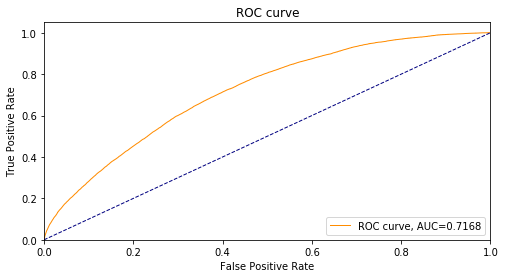

In [175]:
y_score = lr2.decision_function(Xtest_oh[:,cols_to_keep])
fpr, tpr, thresholds = roc_curve(y_true=ytest, y_score=y_score) # Fill here
auc = roc_auc_score(ytest, y_score)

plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve, AUC={auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

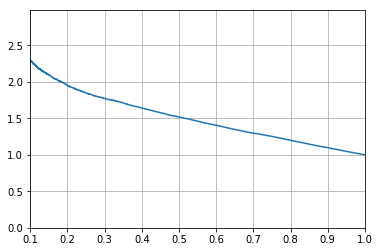

In [176]:
plotlift(soft_pred=soft[:,1], y_true=ytest)
# The following line just plots a vertical line for you to answer the second part of the question
# plt.axvline(x= ???, linestyle='--', color='r') # Fill here

# Gradient Boosting Decision Trees

<font color="red">**Question 35**:
    <br>
    - Import GradientBoostingClassifier from scikit learn. 
    <br>
    - Initialize it using 50 estimators and a learning rate of 0.8. Set 'verbose=True' to monitor the progress of the algorithm.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance as in the previous step.
</font>

In [177]:
Xtrain_oh_ctk = Xtrain_oh[:,cols_to_keep]
Xtest_oh_ctk = Xtest_oh[:,cols_to_keep]

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.8,verbose=True,n_estimators=50)
gb.fit(X=Xtrain_oh_ctk, y=ytrain.values)

      Iter       Train Loss   Remaining Time 
         1           0.8752            4.11m
         2           0.8644            3.70m
         3           0.8600            3.49m
         4           0.8554            3.33m
         5           0.8530            3.23m
         6           0.8496            3.12m
         7           0.8475            3.04m
         8           0.8462            2.97m
         9           0.8447            2.93m
        10           0.8435            2.89m
        20           0.8356            2.20m
        30           0.8306            1.47m
        40           0.8275           44.23s
        50           0.8252            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [179]:
soft = gb.predict_proba(Xtest_oh_ctk)
logloss_gb = log_loss(y_pred=soft, y_true=ytest)
score_gb = gb.score(X=Xtest_oh_ctk, y=ytest)

y_score = gb.decision_function(Xtest_oh_ctk)
auc = roc_auc_score(ytest, y_score)
print (f'Logloss_gb : {logloss_gb}')
print (f'Score_gb : {score_gb}')
print (f'Area under the curve : {auc}')

Logloss_gb : 0.4124669858816379
Score_gb : 0.83306
Area under the curve : 0.7151773518851545


<font color="red">**Question 36**:
    What does the 'gb.estimators_' output?
</font>

In [180]:
gb.estimators_[5]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x110270870>,
           splitter='best')], dtype=object)

We now try to use the 'gb' classifier to generate features that will be relevant inputs for the logistic regression.

<font color="red">**Question 37**:
    With the 'gb.apply()' method, generate a transformation 'leafs_train' of the training set 'Xtrain_oh[:, cols_to_keep]' for which the nth column corresponds to the number of the leaf returned by the estimator n.
</font>

In [181]:
gb.apply(X=Xtrain_oh_ctk).shape

(900000, 50, 1)

After your applied gb.apply on Xtrain_oh[:, cols_to_keep], remember that use have only one class to predict (click = 0 or 1). 

In [182]:
leafs_train = pd.DataFrame(data=gb.apply(X=Xtrain_oh_ctk).reshape([900000,50])) # Fill here
leafs_test = pd.DataFrame(data=gb.apply(X=Xtest_oh_ctk).reshape([100000,50]))

Text(0, 0.5, 'Count')

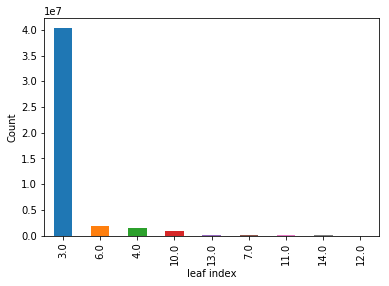

In [183]:
pd.value_counts(leafs_train.values.ravel()).plot.bar()
plt.xlabel('leaf index')
plt.ylabel('Count')

<font color="red">**Question 38**:
    Encode these new features into dummies.
</font>

In [208]:
ohe = OneHotEncoder()
leafs_train_oh = ohe.fit_transform(leafs_train.values)
leafs_test_oh = ohe.transform(leafs_test.values)

print(f'Shape du leafs_train transformé par ohe : {leafs_train_oh.shape}')
print(type(leafs_train_oh))
print()
print(f'Shape du leafs_test transformé par ohe : {leafs_test_oh.shape}')
print(type(leafs_test_oh))

Shape du leafs_train transformé par ohe : (900000, 398)
<class 'scipy.sparse.csr.csr_matrix'>

Shape du leafs_test transformé par ohe : (100000, 398)
<class 'scipy.sparse.csr.csr_matrix'>


<font color="red">**Question 39**:
    With the "hstack" function, create a new matrix of features by concatenating horizontally our new features "leafs_train_oh" and "leafs_test_oh", and previous features used for logistic regression (e.g. in "Xtrain_oh[:, cols_to_keep]").
</font>
<br><br>
**Remark**: we use "hstack" from scipy.sparse (and not from numpy) because the output of our OneHotEncoder is a sparse array. You can verify it with the command "type(Xtrain_oh)".

In [185]:
from scipy.sparse import csr_matrix, hstack
Xtrain_concat = hstack([leafs_train_oh, Xtrain_oh_ctk]) # Fill here
Xtest_concat = hstack([leafs_test_oh, Xtest_oh_ctk])

<font color="red">**Question 40**:
    Run a logistic regression on the new features and evaluate its performance as before.
</font>

In [186]:
lr3 = LogisticRegression(random_state=100)
lr3.fit(X=Xtrain_concat, y=ytrain.values)

hard = lr3.predict(Xtest_concat)
soft = lr3.predict_proba(Xtest_concat)

accuracy = accuracy_score(ytest,hard)
print(f'accuracy : {accuracy}') # Fill here
logloss = log_loss(y_pred=soft,y_true=ytest)
print (f'logloss : {logloss}')

accuracy : 0.83318
logloss : 0.40728817013898877


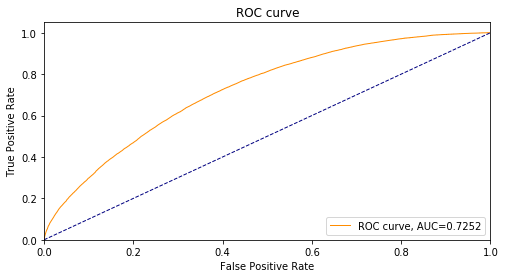

In [192]:
y_score = lr3.decision_function(Xtest_concat)
fpr, tpr, thresholds = roc_curve(y_true=ytest, y_score=y_score) # Fill here
auc = roc_auc_score(ytest, y_score)

plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve, AUC={auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

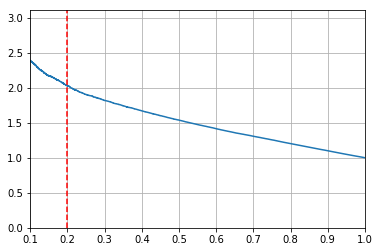

In [193]:
plotlift(soft_pred=soft[:,1], y_true=ytest)
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2, linestyle='--', color='r') # Fill here

<font color="red">**Question 41**:
    <br>
    - Import XGBClassifier from xgboost package.
    <br>
    - Initialize it using the same number of estimators and learning rate as before. 
    <br>
    - Which value of n_jobs did you choose?
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance and compare it to the GradientBoosting classifier of scikit learn. How is the error? Does it take more time to run?
</font>

In [194]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=100, n_jobs=8, learning_rate=0.8, n_estimators=50)
%time xgb.fit(Xtrain_oh_ctk, ytrain)

CPU times: user 1min 8s, sys: 928 ms, total: 1min 9s
Wall time: 1min 9s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=8, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [195]:
soft = xgb.predict_proba(Xtest_oh_ctk)
logloss_xgb = log_loss(y_pred=soft, y_true=ytest)
score_xgb = xgb.score(X=Xtest_oh_ctk, y=ytest)

print(f'Logloss_xgb : {logloss_xgb}')
print(f'Logloss_gb : {logloss_gb}')
print()
print(f'Score_xgb : {score_xgb}')
print(f'Score_gb : {score_gb}')

Logloss_xgb : 0.41193039575475265
Logloss_gb : 0.4124669858816379

Score_xgb : 0.83312
Score_gb : 0.83306


On constate que le score du XGBoost est à peine mieux que ce qu'on avait au début.
La manière dont on calcule ce score n'est pas bon.

XGBoost a un temps de calcul environ 4 fois moins long que celui de GBoosting et pourtant les résultats obetenus sont presque identiques. 
Nous avons choisi la valeur de n_jobs = 8 (Number of parallel threads used to run xgboost) car cela correspond au nombre de vCPU disponible sur mon cluster AWS (4x physical cores and 2 threads per core)

<font color="red">**Question 42**:
    Increase the number of estimators (e.g. 1024) and visualize the impact on performance. You might have to adapt the learning rate.
</font>

In [196]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=100, n_jobs=8, learning_rate=0.8, n_estimators=1024)
%time xgb.fit(Xtrain_oh_ctk, ytrain)

CPU times: user 21min 31s, sys: 6.82 s, total: 21min 38s
Wall time: 21min 49s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1024,
       n_jobs=8, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [197]:
soft = xgb.predict_proba(Xtest_oh_ctk)
logloss_xgb = log_loss(y_pred=soft, y_true=ytest)
score_xgb = xgb.score(X=Xtest_oh_ctk, y=ytest)

print(f'Logloss_xgb : {logloss_xgb}')
print(f'Logloss_gb : {logloss_gb}')
print()
print(f'Score_xgb : {score_xgb}')
print(f'Score_gb : {score_gb}')

Logloss_xgb : 0.405577532555271
Logloss_gb : 0.4124669858816379

Score_xgb : 0.83313
Score_gb : 0.83306


On se rend compte qu'en augmentant le nombre d'estimateurs, cela augmente la performence du model prédictif. Néanmoins le temps de calcul a lui aussi beaucoup augmenté. 
Nous avons laissé volontairement un learning rate assez élevé pour ne pas trop augmenter le temps de calcul : 

<i> Empirically it has been found that using small learning rates (such as nu < 0.1) yields dramatic improvements in model's generalization ability over gradient boosting without shrinking (nu=1). However, it comes at the price of increasing computational time both during training and querying: lower learning rate requires more iterations.</i>

# Features hashing and random forest

We restart with raw features before dummy encoding: Xtrain, Xtest.

<font color="red">**Question 43**:
    Display again the number of modalities per feature in Xtrain.
</font>

In [198]:
Xtrain.nunique()

hour                    24
C1                       7
banner_pos               7
site_category           22
app_id                3054
app_domain             196
app_category            26
device_type              5
device_conn_type         4
C14                   2225
C15                      8
C16                      9
C17                    420
C18                      4
C19                     66
C20                    163
C21                     60
weekday                  7
user                701585
site                  5442
dtype: int64

We want to define a transformation which regroups the least frequent modalities into a label 'isRare'. In order to do so, we decide to define our own Transformer.

<font color="red">**Question 44**:
    Understand the different steps of 'fit' and 'transform'.
</font>

In [199]:
from sklearn.base import BaseEstimator, TransformerMixin

class MergeRareTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_names, threshold):
        self.col_names = col_names
        self.threshold = threshold

    def fit(self, X, y=None):

        X = pd.DataFrame(X)
        counts_dict_list = []
        ################## READ THIS #########################
        for i in range(len(self.col_names)):
            
            serie = X[self.col_names[i]].value_counts()  # Série des counts de chaque modalité
            rare_indexes = serie[serie<self.threshold[i]].index  # A quoi correspondent ces indices ?
            frequent_indexes = serie[serie>=self.threshold[i]].index  # A quoi correspondent ces indices ?
            dico = {x:'isRare' for x in rare_indexes}
            dico.update({x: str(x) for x in frequent_indexes})
            counts_dict_list.append(dico)   # Quel est le dictionnaire obtenu ?
            
        ######################################################
            
        self.counts_dict_list_ = counts_dict_list
        return self

    def transform(self, X):

        Xt = pd.DataFrame()
        ################## READ THIS #########################
        for col, count_dict in zip(self.col_names, self.counts_dict_list_):
            Xt[col] = X[col].apply(lambda x:count_dict[x] if x in count_dict else 'isRare')
            # A quoi sert le "else 'isRare'" dans la transformation de la colonne ?
        ######################################################

        return Xt


In [65]:
# La fonction fit itère sur les colonnes, ici nous prenons la colonne weekday à titre d'expemple 
# avec un threshold arbitraire à 100000

counts_dict_list = []
serie = X.weekday.value_counts()
print(f'Serie: \n{serie}\n')
rare_indexes = serie[serie<100000].index
print(f'index rares : \n{rare_indexes.values}\n')
frequent_indexes = serie[serie>=100000].index
print(f'index fréquents: \n{frequent_indexes.values}\n')
dico = {x:'isRare' for x in rare_indexes}
print(f'dico : \n{dico}\n')
dico.update({x: str(x) for x in frequent_indexes})
print(f'dico après update: \n{dico}\n')
counts_dict_list.append(dico)
print(f'liste de dico : \n{counts_dict_list}')

Serie: 
1    232880
2    226412
3    200173
6     94858
5     83176
4     82651
0     79850
Name: weekday, dtype: int64

index rares : 
[6 5 4 0]

index fréquents: 
[1 2 3]

dico : 
{6: 'isRare', 5: 'isRare', 4: 'isRare', 0: 'isRare'}

dico après update: 
{6: 'isRare', 5: 'isRare', 4: 'isRare', 0: 'isRare', 1: '1', 2: '2', 3: '3'}

liste de dico : 
[{6: 'isRare', 5: 'isRare', 4: 'isRare', 0: 'isRare', 1: '1', 2: '2', 3: '3'}]


La fonction permet de donner la valeur "isRare", de regrouper dans chaque colonne les valeurs qui ont un faible taux d'apparition (définit par l'utilisateur).


Dans la fonction fonction fit() :

Pour chaque colonne on stocke les valeurs avec un faible taux d'apparition (grâce au threshold défini par l'utilisateur) dans rare_indexes et les autres valeurs sont ajoutées à l'array frequent_indexes. La méthode stoque ensuite les correspondances entre les anciennes valeurs et les nouvelles.

Fonction Transform : 

La fonction Transform doit être appliquée sur Xtest mais on ne Fit pas sur Xtest, on ne Fit que sur Xtrain. Par conséquent il est possible que certaines modalités soient dans Xtest mais n'aient jamais été rencontrées dans le Xtrain. Dans ce cas, ces modalités de Xtest ne seront pas présentent dans la liste "counts_dict_list_". C'est pour ces cas que l'on ajoute 'else "is Rare" ' de façon à ce que ces modalités prennent la valeur is Rare.

<font color="red">**Question 45:**
    <br>
    - Fit and transform the training set. To do so, merge all mmodalities occuring at least 20 times in each column.
    <br>
    - Transform the test set.
</font>

In [200]:
mg = MergeRareTransformer(col_names=Xtrain.columns, threshold=[20]*len(Xtrain.columns))
Xtrain_mg = mg.fit_transform(Xtrain) # Fill here with fit_transform or fit then transform.
Xtest_mg = mg.transform(Xtest)

<font color="red">**Question 46:**
   How many elements of the column Xtrain_mg['app_domain'] are now labeled as 'rare'?
</font>

In [201]:
israre = Xtrain_mg.app_domain[Xtrain_mg['app_domain']=='isRare']
print(f'Nombre de app_domain rare : {israre.count()}\n')
print(israre.head(5))

Nombre de app_domain rare : 513

159130    isRare
701094    isRare
293592    isRare
470991    isRare
989463    isRare
Name: app_domain, dtype: object


<font color="red">**Question 47:**
   In the new train set, display the number of modalities for each feature.
</font>

In [202]:
Xtrain_mg.nunique()

hour                  24
C1                     7
banner_pos             7
site_category         18
app_id               613
app_domain            53
app_category          19
device_type            5
device_conn_type       4
C14                 1339
C15                    8
C16                    9
C17                  381
C18                    4
C19                   63
C20                  148
C21                   60
weekday                7
user                 901
site                 889
dtype: int64

Modalities are arbitrary object, such as '234', 'isRare', etc. We will now transorm them into integers with the hashing trick.
<font color="red">**Question 48:**
   To better understand how the 'hash' function is working, apply it to a string of your choice.
</font>

In [203]:
import hashlib
hash('test de la fonction hash')

5808490783930082882

<font color="red">**Question 49:**
   Create two new datasets 'Xtrain_ha' and 'Xtest_ha' containing the output of the hashing process. Use the '.apply' method to transform iteratively the columns by mapping to each value its remainder in the euclidean division of the hash by 1000000. 
   Example:
</font>
</font>
<p>
<center>
2060777048690<font color="red">918393</font>  -->  918393
</center>
Remark: do not forget that the function 'hash' has to take a string as input.

In [204]:
Xtrain_ha = pd.DataFrame()
Xtest_ha = pd.DataFrame()
for col in Xtrain_mg.columns:
    Xtrain_ha[col] = Xtrain_mg[col].apply(lambda x: hash(x)).mod(1000000) # Fill here defining a lambda function
    Xtest_ha[col] = Xtest_mg[col].apply(lambda x: hash(x)).mod(1000000)

<font color="red">**Question 50:**
   Visualize the content of the DataFrames you have obtained.
</font>

In [205]:
print(Xtrain_ha.head(5))
print(Xtrain_ha.nunique)

          hour      C1  banner_pos  site_category  app_id  app_domain  \
92438   151183   47878      872609         431392  331927      171413   
60898    50869  961988      667190         431392  408973      251326   
556199  440471  961988      667190         927399  814183      171413   
193129  124453  961988      872609         927399  814183      171413   
231985  479677  961988      667190         593658  814183      171413   

        app_category  device_type  device_conn_type     C14     C15     C16  \
92438         662152       440471            612944   20377  192088  155700   
60898         847787       872609            612559   20377  192088  155700   
556199        516168       872609            612559    6022  192088  155700   
193129        516168       872609            667190  716784  192088  155700   
231985        516168       872609            667190  991339  192088  155700   

           C17     C18     C19     C20     C21  weekday    user    site  
92438   2868

<font color="red">**Question 51:**
    <br>
    - Train a RandomForestClassifier on Xtrain_ha and evaluate its performance on Xtest_ha. One can chose 1024 estimators, min_samples_leaf=20 and verbose=1 in order to monitor the fitting step.
    <br>
</font>

In [209]:
from sklearn.ensemble import RandomForestClassifier # Fill here
rf = RandomForestClassifier(n_estimators=1024, n_jobs=8, min_samples_leaf=20, verbose=True)
rf.fit(Xtrain_ha, ytrain)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 11.5min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 20.8min
[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed: 26.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1024, n_jobs=8,
            oob_score=False, random_state=None, verbose=True,
            warm_start=False)

In [210]:
soft = rf.predict_proba(Xtest_ha)
logloss_rf = log_loss(y_pred=soft, y_true=ytest)

# y_score = rf.decision_path(Xtest_ha)
# auc_rf = roc_auc_score(ytest, y_score)

print(f'Logloss_rf : {logloss_rf}')
print()
# print(f'Area under the curve : {auc_rf}')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   10.9s


Logloss_rf : 0.4007508573549109



[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:   14.5s finished


<font color="red">**Question 52:**
   Compare with xgboost performance on the same hashed dataset.
</font>

In [211]:
xgb = XGBClassifier(random_state=100, n_jobs=8, learning_rate=0.8, n_estimators=1024)
%time xgb.fit(Xtrain_ha, ytrain)

CPU times: user 25min 51s, sys: 7.86 s, total: 25min 59s
Wall time: 26min 11s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1024,
       n_jobs=8, nthread=None, objective='binary:logistic',
       random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [212]:
soft = xgb.predict_proba(Xtest_ha)
logloss_xgb = log_loss(y_pred=soft, y_true=ytest)

print(f'Logloss_xgb : {logloss_xgb}')

Logloss_xgb : 0.39881537979174886


In [218]:
soft

array([[0.67747784, 0.3225222 ],
       [0.5054573 , 0.49454275],
       [0.92270267, 0.07729734],
       ...,
       [0.76540285, 0.23459713],
       [0.7688538 , 0.2311462 ],
       [0.90503985, 0.09496015]], dtype=float32)

<font color="red">**Question 53:**
    Plot the ROC and the lift curves for the obtained classifier (xgboost on hashed data).
</font>

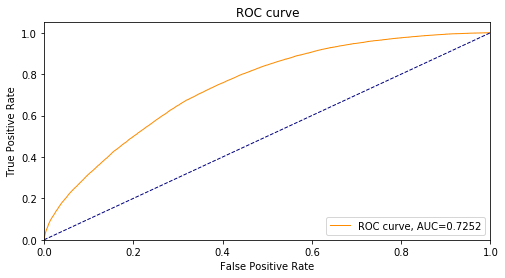

In [223]:
# Plot the lift curve here
# plotlift(ytest, soft[1])
# fpr,tpr,th=roc_curve(y_test,soft[1]) # Fill here.
# plt.plot(fpr, tpr, label='ROC curve')

#y_score = xgb.decision_function(Xtest_ha)
fpr, tpr, thresholds = roc_curve(y_true=ytest, y_score=soft[:,1]) # Fill here
auc = roc_auc_score(ytest, y_score)

plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve, AUC={auc:.4f}')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

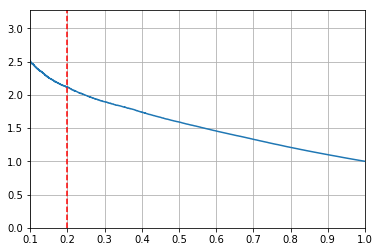

In [225]:
plotlift(ytest, soft[:,1])
plt.axvline(x= 0.2, linestyle='--', color='r') # Fill here

Hashing produces columns of integers arbitrarily ordered. One can wonder if adding more columns hashed in a different fashion would lead to better performance. 

<font color="red">**Question 54:**
    Add hashed columns by recursively hashing the previous ones: complete the following code. 
</font>

In [215]:
def hash_string_euclidean_division(originalValue):
    return hash(str(originalValue)) % 1000000


Xtrain_haha = pd.DataFrame(Xtrain_ha).copy()
Xtest_haha = pd.DataFrame(Xtest_ha).copy()

n_hash = 3
cols = Xtrain_ha.columns
for l in range(n_hash):
    for col in cols:
        Xtrain_haha[col + '-hash'] = Xtrain_haha[col].apply(lambda x: hash_string_euclidean_division(x))
        Xtest_haha[col + '-hash'] = Xtest_haha[col].apply(lambda x: hash_string_euclidean_division(x))
    cols = [col + '-hash' for col in cols]

<font color="red">**Question 55:**
    Evaluate the performance of a random forest and/or an xgboost clasifier on these enlarged dataset.
</font>

In [ ]:
xgb = XGBClassifier(random_state=100, n_jobs=8, learning_rate=0.8, n_estimators=1024)
%time xgb.fit(Xtrain_haha, ytrain)

<font color="red">**Question 55:**
    Compare the different models used in the TP.
</font>

Model	

LR_reduced	Logloss : 0,425122	Time :22''

LR_complete	Logloss : 0,410753	Time :45''

GradBoost1	Logloss : 0,412466	Time :3'38''

LR_new_features	Logloss : 0,407288	Time :4'48"

XGB1	Logloss : 0,41193	Time :1'09"

XGB2	Logloss : 0,405577	Time :21'49"

RF_ha	Logloss : 0,40075	Time :26'09"

XGB_ha	Logloss : 0,398815	Time :26'11"

XGB_haha	Logloss : 0,399683	Time :28'46




## Conclusion
Nous nous rendons compte que le temps de calcul augmente enormément pour des améliorations assez faible. La meilleurs Logloss est obtenue pour le XGBoost avec une seul hashage.